# Handling Missing Data in Python


# Handling Missing Data in Python

## Introduction

Missing data is a common issue in data analysis and machine learning. It occurs when no value is stored for a variable in an observation. Handling missing data effectively is crucial because it can significantly impact the performance of your models and the insights you derive from your data. There are several techniques to handle missing data, including removal (deletion) and imputation.

In this notebook, we will explore different methods to handle missing data, including:

1. **Removal (Deletion)**
   - Listwise Deletion
   
2. **Imputation (Substitution)**
   - Mean Imputation
   - K-Nearest Neighbors (KNN) Imputation
   - Multiple Imputation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [2]:
# Set the random seed for reproducibility
np.random.seed(0)

## Create Sample Data
data = pd.DataFrame({
    'X': np.random.randn(100),
    'Y': np.random.randn(100)
})

In [3]:
# Introduce some missing values
data.loc[5:14, 'Y'] = np.nan
print(data.head(17))

# No of missing values
print("\n\nMissing values (Y): ",sum(data['Y'].head(17).isnull()==True))



           X         Y
0   1.764052  1.883151
1   0.400157 -1.347759
2   0.978738 -1.270485
3   2.240893  0.969397
4   1.867558 -1.173123
5  -0.977278       NaN
6   0.950088       NaN
7  -0.151357       NaN
8  -0.103219       NaN
9   0.410599       NaN
10  0.144044       NaN
11  1.454274       NaN
12  0.761038       NaN
13  0.121675       NaN
14  0.443863       NaN
15  0.333674  0.802456
16  1.494079  0.947252


Missing values (Y):  10


In [4]:
## Technique 1: Removal (Deletion)
# May cause loss of important data, as if even one attribute is null, this drops the whole row

# Listwise Delete

listwise_deleted_data = data.dropna()

In [5]:
print(listwise_deleted_data.head(17))

print("Missing values (Y): ",sum(listwise_deleted_data['Y'].head(17).isnull()==True))

           X         Y
0   1.764052  1.883151
1   0.400157 -1.347759
2   0.978738 -1.270485
3   2.240893  0.969397
4   1.867558 -1.173123
15  0.333674  0.802456
16  1.494079  0.947252
17 -0.205158 -0.155010
18  0.313068  0.614079
19 -0.854096  0.922207
20 -2.552990  0.376426
21  0.653619 -1.099401
22  0.864436  0.298238
23 -0.742165  1.326386
24  2.269755 -0.694568
25 -1.454366 -0.149635
26  0.045759 -0.435154
Missing values (Y):  0


In [6]:
## Technique 2: Imputation
# In statistics, imputation is the process of replacing missing data with substituted values.

# Mean Imputation
mean_imputed_data = data.copy()
mean_imputed_data['Y'].fillna(mean_imputed_data['Y'].mean(), inplace=True)

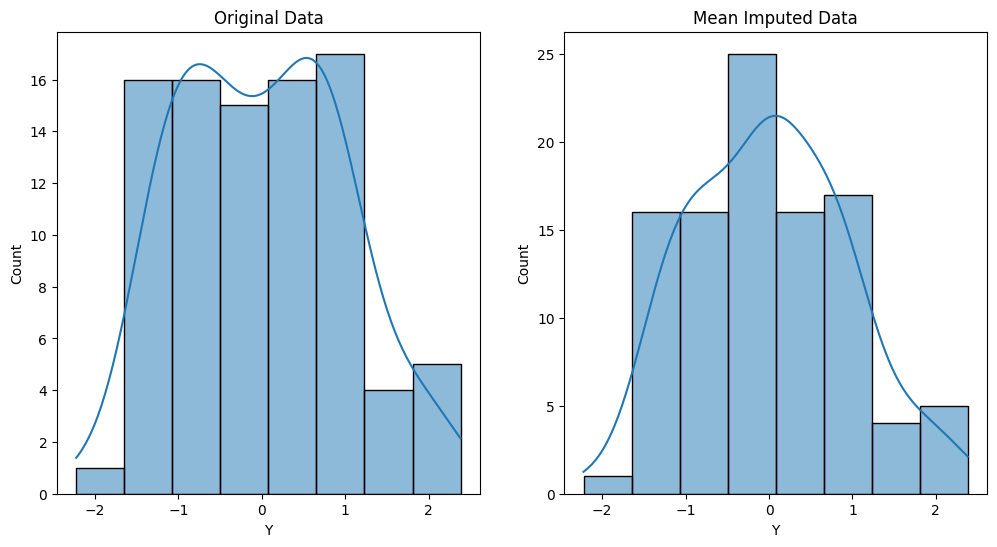

In [7]:
# Visualization: Mean Imputation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Y'], kde=True)
plt.title('Original Data')
plt.subplot(1, 2, 2)
sns.histplot(mean_imputed_data['Y'], kde=True)
plt.title('Mean Imputed Data')
plt.show()


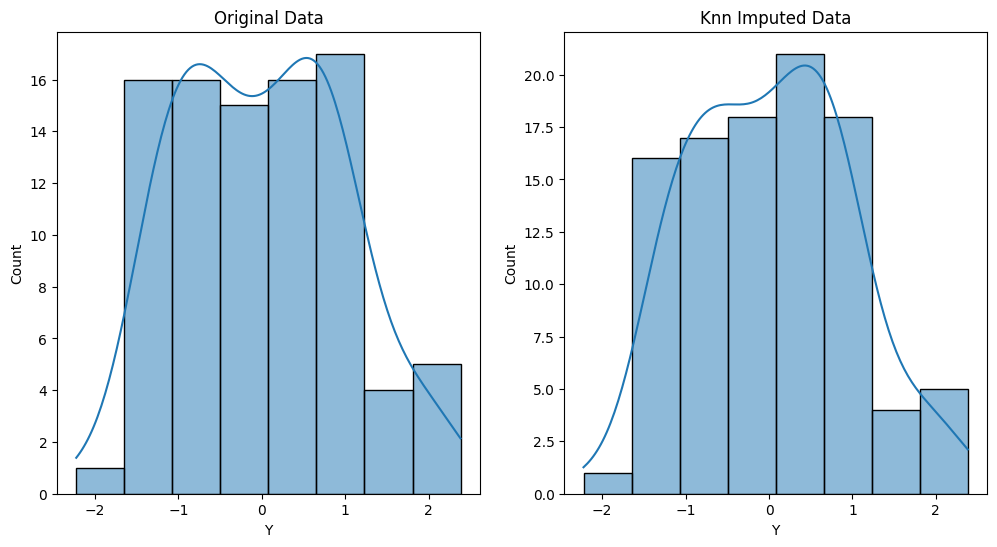

In [8]:
# KNN Imputation

## based on k nearest values, the KNN algorithm

knn_imputer = KNNImputer(n_neighbors=5)
knn_imputed_data = pd.DataFrame(knn_imputer.fit_transform(data), columns=data.columns)

# Visualization: KNN Imputation


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Y'], kde=True)
plt.title('Original Data')
plt.subplot(1, 2, 2)
sns.histplot(knn_imputed_data['Y'], kde=True)
plt.title('Knn Imputed Data')
plt.show()

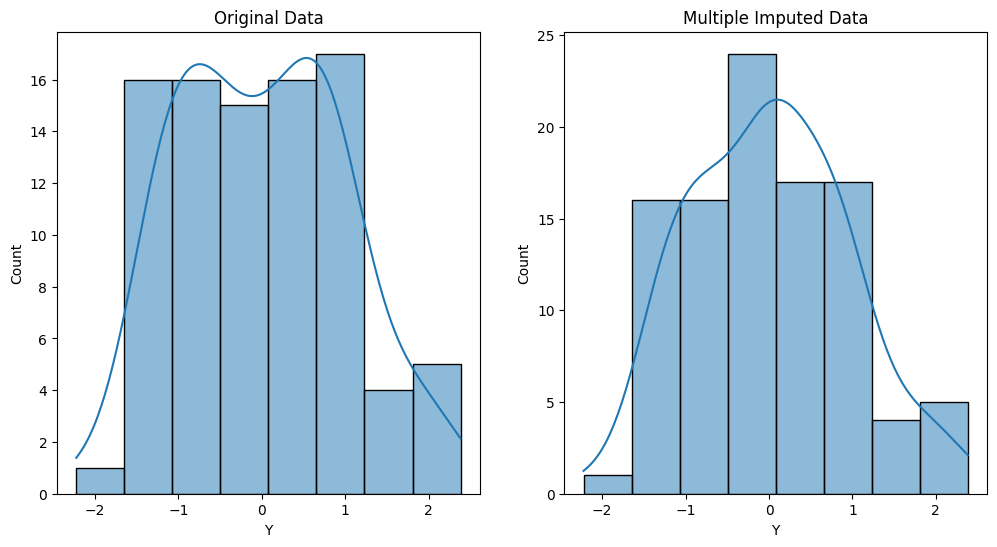

In [9]:
# Multiple Imputation using IterativeImputer from sklearn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Multiple Imputation
iterative_imputer = IterativeImputer(max_iter=10, random_state=0)
multiple_imputed_data = pd.DataFrame(iterative_imputer.fit_transform(data), columns=data.columns)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Y'], kde=True)
plt.title('Original Data')
plt.subplot(1, 2, 2)
sns.histplot(multiple_imputed_data['Y'], kde=True)
plt.title('Multiple Imputed Data')
plt.show()



In [ ]:
# Display Summary of Imputed Values
imputed_summary = pd.DataFrame({
    'Original': data['Y'],
    'Mean Imputed': mean_imputed_data['Y'],
    'KNN Imputed': knn_imputed_data['Y'],
    'Multiple Imputed': multiple_imputed_data['Y']
})
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
sns.histplot(data['Y'], kde=True)
plt.title('Original Data')
plt.subplot(1, 4, 2)
sns.histplot(mean_imputed_data['Y'], kde=True)
plt.title('Mean Imputed Data')
plt.subplot(1, 4, 3)
sns.histplot(mean_imputed_data['Y'], kde=True)
plt.title('KNN Imputed Data')
plt.subplot(1, 4, 4)
sns.histplot(mean_imputed_data['Y'], kde=True)
plt.title('Multiple Imputed Data')
plt.show()
imputed_summary.head(15)

# Conclusion

In this notebook, we have explored several techniques for handling missing data, including removal and various imputation methods. Each technique has its own advantages and drawbacks, and the choice of method depends on the nature of your data and the specific requirements of your analysis

### Key Takeaways:

1. **Removal (Deletion)**
   - **Listwise Deletion**: This method removes any rows with missing values. While it is simple to implement, it can result in significant data loss, especially if the dataset has many missing values.

2. **Imputation**
   - **Mean Imputation**: This method replaces missing values with the mean of the available data. It is straightforward but can distort the data distribution and reduce variability.
   - **K-Nearest Neighbors (KNN) Imputation**: This method uses the nearest neighbors to estimate the missing values. It is more sophisticated than mean imputation and can better preserve data relationships, but it requires tuning and can be computationally intensive.
   - **Multiple Imputation**: This method involves creating multiple imputed datasets and combining the results. It provides a robust way to handle missing data by incorporating uncertainty in the imputation process, but it is more complex to implement.

### Visual Impact:

Through various visualizations, we have seen how these techniques affect the data. Visualizing the results helps to understand the changes in data distribution and relationships, which is crucial for making informed decisions about the best method to use.

Handling missing data appropriately is essential for maintaining the integrity and reliability of your analysis. By choosing the right technique, you can mitigate the adverse effects of missing data and ensure your models and insights are based on complete and acc learning projects.